In [9]:
% matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model

from rlemmc import policy

In [5]:
# Training Set
sampleCount = 20
states = np.random.randn(sampleCount,2)
actions = 1 * (np.sum(states,axis=1) > 0)

In [10]:
# Training
# logisticRegression = linear_model.LogisticRegression()
# logisticRegression.fit(states, actions)
p = policy.LogisticRegressionPolicy()
p.train(states, actions)

In [11]:
# Testing
M = 100
X = np.random.randn(M,2)
Y = 1 * (np.sum(X,axis=1) > 0)
A = p.query(X)
# A = logisticRegression.predict(X)

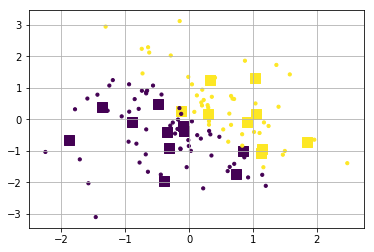

Perfomance = 0.87


In [13]:
# Plot
plt.scatter(states[:,0], states[:,1], c=actions, s=100, marker='s')
plt.scatter(X[:,0], X[:,1], c=A, s=10, marker='o')
plt.grid()
plt.show()

# Evaluation
print(f'Perfomance = {sum(1*(A == Y)) / M}')

In [15]:
from sympy.solvers import solve
from sympy import Symbol

def f(x1,x2):
    return p.method.coef_[0][0]*x1-p.method.coef_[0][1]*x2

x1 = Symbol('x1')
x2 = Symbol('x2')

a, = solve(f(x1,x2))

In [17]:
m = float(str.split(str(a.get(x1)),'*')[0])
print(m)

0.645933007226773


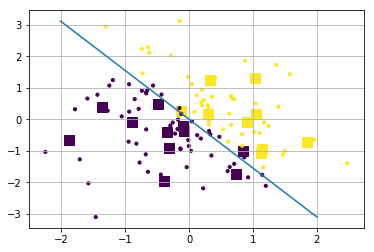

In [19]:
# Plot
plt.scatter(states[:,0], states[:,1], c=actions, s=100, marker='s')
plt.scatter(X[:,0], X[:,1], c=A, s=10, marker='o')
xr = np.linspace(min(X[:,1]),max(X[:,1]))
plt.plot(-m*xr,xr)
plt.grid()
plt.show()